In [19]:
import matplotlib.pyplot as plt
import random

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["", ""]

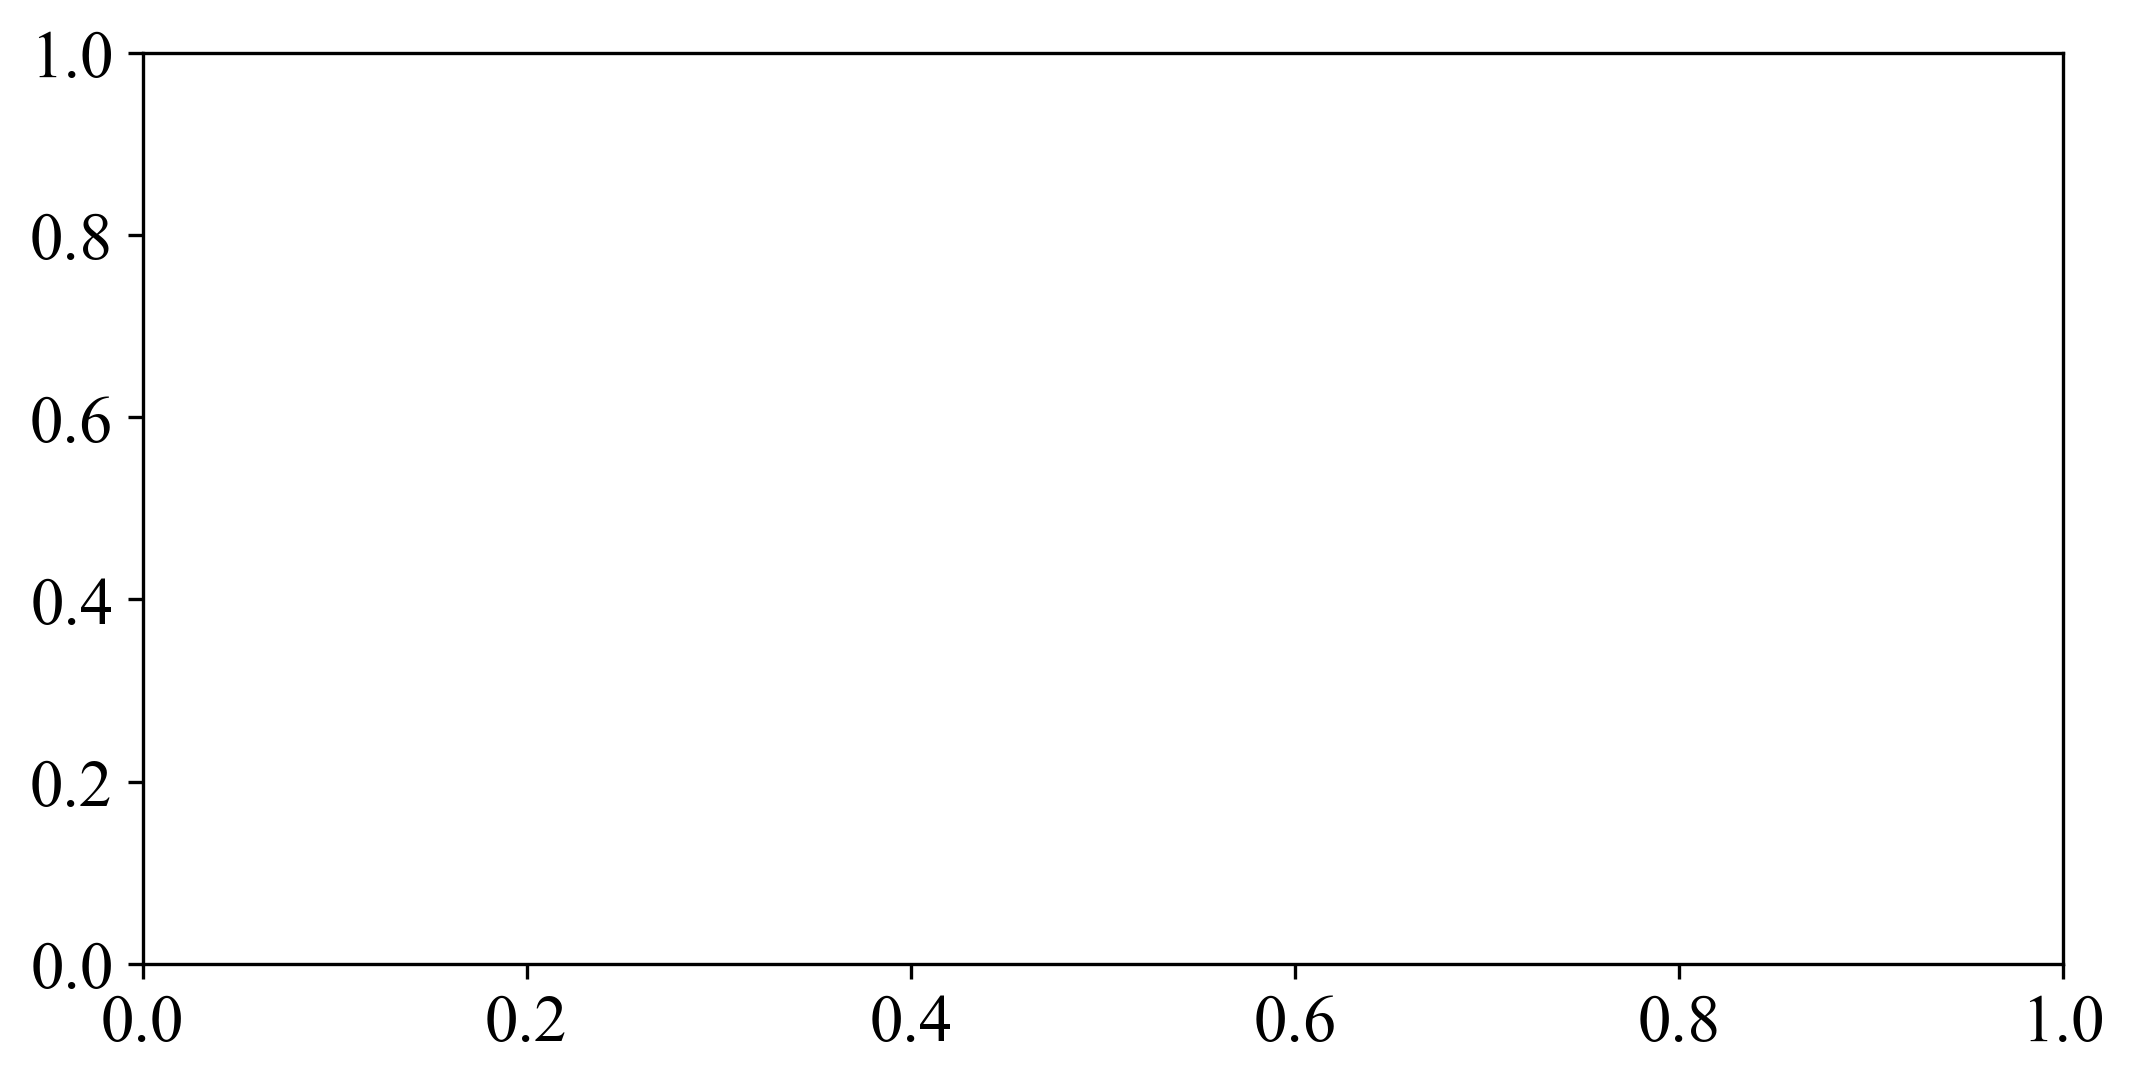

In [20]:
fig, ax = plt.subplots(
    figsize=(7, 7 / 2), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [21]:
labels_name_a = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelA\n2DP$\\times$4TP",
    "ModelA\n2DP$\\times$8TP",
    "ModelA\n4DP$\\times$2TP",
    "ModelB\n8TP",
    "ModelB\n4DP$\\times$2TP",
]

In [22]:
# MFU
data_a = {
    labels_name_a[0]: [39.3, 44.4],  # modela 8DP
    labels_name_a[1]: [39.3, 43.6],  # modela 8TP
    labels_name_a[2]: [33.8, 44.6],  # modela 2DP 4TP
    labels_name_a[3]: [38.0, 42.6],  # modela 2DP 8TP
    labels_name_a[4]: [36.9, 44.7],  # modela 4DP 2TP
    labels_name_a[5]: [43.4, 49.4],  # modelb 8TP
    labels_name_a[6]: [37.6, 38.0],  # modelb 4DP 2TP
}

data_b = [
    random.uniform(550, 650),
    random.uniform(550, 650),
    random.uniform(550, 650),
    random.uniform(550, 650),
    random.uniform(550, 650),
    random.uniform(670, 770),
    random.uniform(670, 770),
]
data_c = [
    random.uniform(190, 250),
    random.uniform(190, 250),
    random.uniform(190, 250),
    random.uniform(190, 250),
    random.uniform(190, 250),
    random.uniform(250, 310),
    random.uniform(250, 310),
]

In [23]:
legend_labels = ["ILP", "DLRover-Lynx"]

In [24]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 2

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [25]:
label_set = set()
for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]

    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)

        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 100)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize - 4, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)
ax.set_ylabel("MFU (%)", fontsize=g_label_fontsize)

ax2 = ax.twinx()
ax2.plot(list(group_centers.values()), data_b, "^--", color=colors[0])
ax2.plot(list(group_centers.values()), data_c, "v--", color=colors[1])
ax2.set_ylim(0, 805)
ax2.set_yticks([0, 200, 400, 600, 800])
ax2.set_yticklabels(["0", "200", "400", "600", "800"], rotation=90, va="center")
ax2.tick_params(axis="y", left=True, labelsize=g_label_fontsize)
ax2.set_ylabel("Time (s)", fontsize=g_label_fontsize)

Text(0, 0.5, 'Time (s)')

In [26]:
fig.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 0.98),
    fontsize=g_label_fontsize,
)

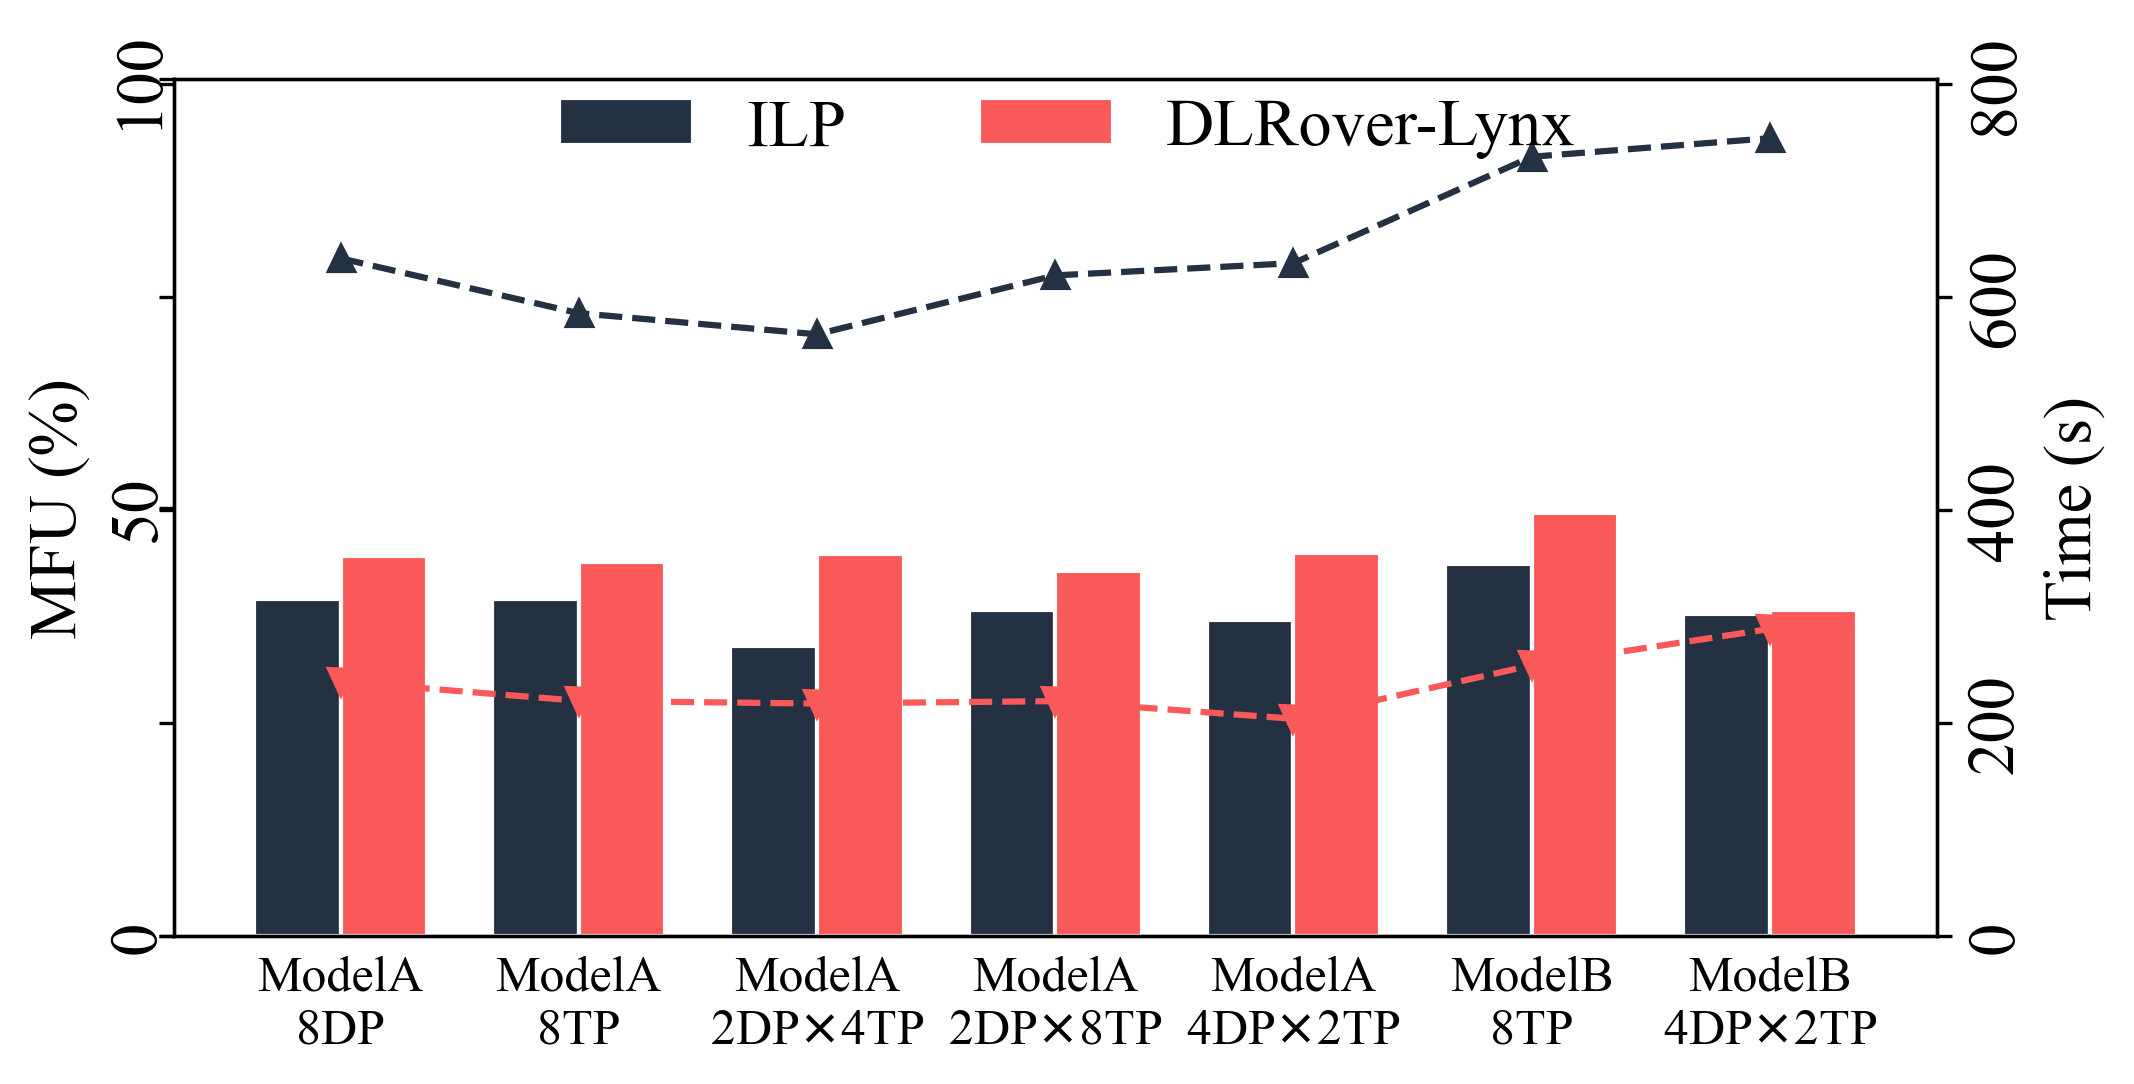

In [27]:
fig.savefig("or_tool.pdf", bbox_inches="tight", dpi=1000)
fig